In [1]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [2]:
X, y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

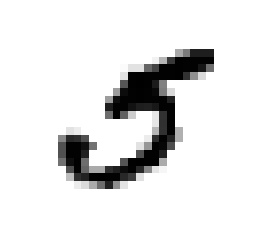

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=plt.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [18]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [19]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [20]:
y_train_5 = y_train == 5
y_test_5 = y_test == 5

In [33]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=5)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [34]:
sgd_clf.predict([some_digit])

array([ True])

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.96275, 0.95965, 0.96285])

In [36]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [37]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9099 , 0.90955, 0.9095 ])

In [38]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[54065,   514],
       [ 1781,  3640]])

In [40]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8762638420799229
0.6714628297362111


In [41]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.760313315926893

In [42]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([111134.08668696])

In [44]:
threshold = 0
y_some_digit_pred = y_scores > threshold
y_some_digit_pred

array([ True])

In [45]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [46]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

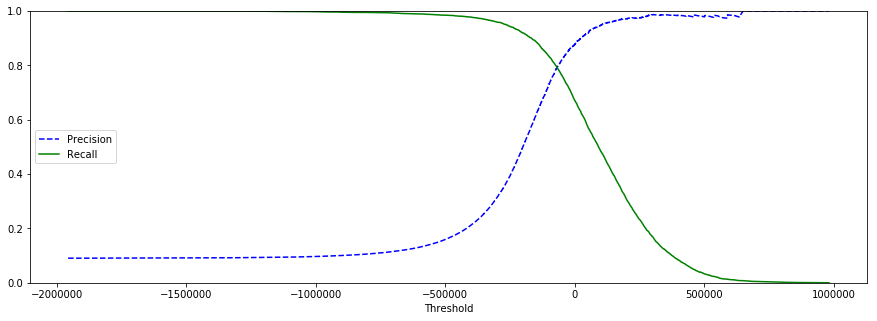

In [51]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(15, 5))
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center left')
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

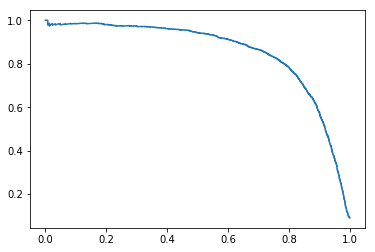

In [52]:
plt.plot(recalls, precisions)

In [54]:
y_train_pred_90 = y_scores > 70000
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.9341221618164375
0.5388304740822727


In [55]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

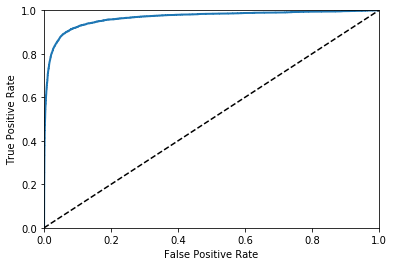

In [57]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [58]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.966223081726831

In [59]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method='predict_proba')

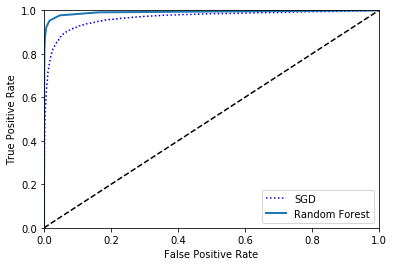

In [61]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [62]:
roc_auc_score(y_train_5, y_scores_forest)

0.9917006468986893

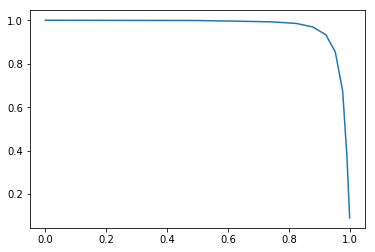

In [64]:
precisions, recalls, _ = precision_recall_curve(y_train_5, y_scores_forest)
plt.plot(recalls, precisions)

In [65]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([5.])

In [66]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-279974.7132594 , -510757.28341429, -312082.57118754,
        -347050.84868821, -365260.02915371,  111134.08668696,
        -681392.65020575, -416828.96424506, -560686.29275524,
        -557570.782823  ]])

In [68]:
print(np.argmax(some_digit_scores))
print(sgd_clf.classes_)
print(sgd_clf.classes_[5])

5
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
5.0


In [82]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42, max_iter=5))
ovo_clf.fit(X_train, y_train)
print(ovo_clf.predict([some_digit]))
print(len(ovo_clf.estimators_))

[5.]
45


In [83]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5.])

In [84]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0.2, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [85]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.84168166, 0.87694385, 0.83152473])

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.9090182 , 0.90959548, 0.91093664])

In [87]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5740,    2,   22,    9,   10,   43,   49,    7,   38,    3],
       [   1, 6480,   46,   25,    6,   40,    9,    7,  115,   13],
       [  60,   32, 5333,  110,   77,   23,   97,   55,  160,   11],
       [  47,   39,  130, 5343,    2,  247,   33,   53,  134,  103],
       [  23,   28,   34,    6, 5388,    8,   59,   26,   76,  194],
       [  78,   37,   39,  187,   73, 4614,  106,   25,  173,   89],
       [  27,   25,   39,    2,   38,  102, 5631,    3,   51,    0],
       [  26,   20,   73,   25,   58,   12,    7, 5767,   17,  260],
       [  62,  158,   72,  165,   16,  163,   54,   25, 5004,  132],
       [  43,   39,   30,   84,  165,   37,    2,  176,   82, 5291]])

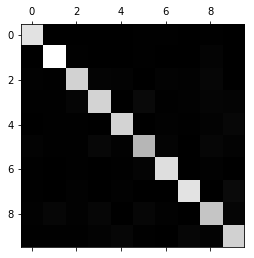

In [90]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

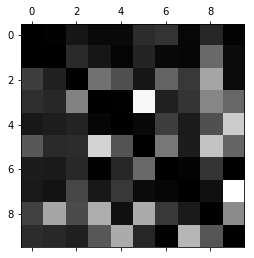

In [94]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [122]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=plt.cm.binary, interpolation='nearest')
    plt.axis('off')
    
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(28, 28) for instance in instances]
    n_rows = (len(images) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(images)
    images.append(np.zeros((28, 28 * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images)
    plt.imshow(image, cmap=plt.cm.binary, **options)
    plt.axis('off')

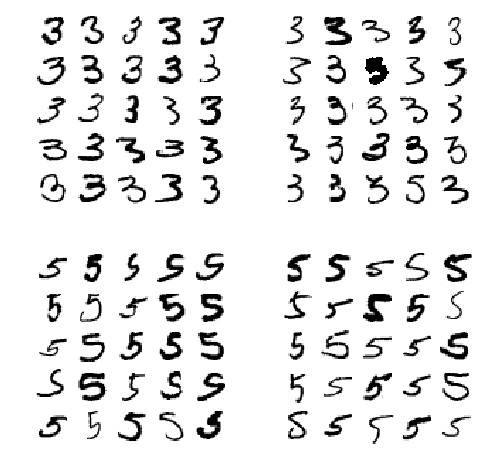

In [102]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [103]:
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5795,    1,   21,   17,   10,   17,   28,    2,   30,    2],
       [   3, 6618,   39,   21,   16,   12,    6,   10,   12,    5],
       [  51,   29, 5625,   45,   37,   10,   31,   53,   61,   16],
       [  23,   28,  132, 5645,   13,  112,    7,   47,   87,   37],
       [  11,   22,   31,   14, 5506,    8,   39,   23,   24,  164],
       [  51,   18,   26,  182,   27, 4966,   57,   10,   55,   29],
       [  47,   16,   23,    3,   30,   67, 5700,    2,   28,    2],
       [  11,   38,   90,   20,   73,    8,    1, 5905,   14,  105],
       [  23,   60,  107,  118,   56,   97,   39,   16, 5261,   74],
       [  29,   12,   38,   95,  201,   38,    5,   93,   67, 5371]])

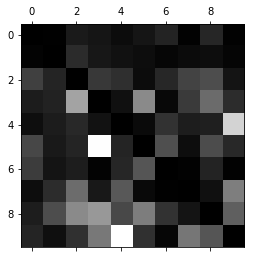

In [107]:
sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

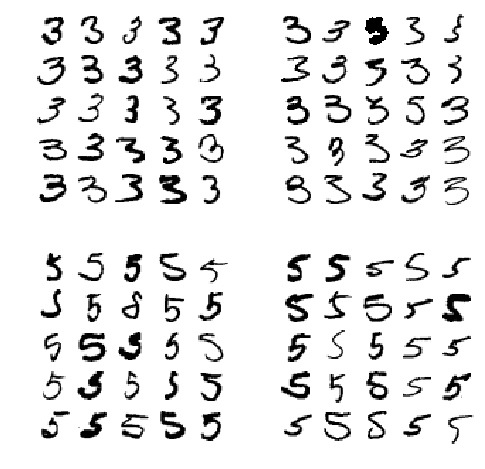

In [108]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [109]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = y_train >= 7
y_train_odd = y_train % 2 == 1
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [110]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [111]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

KeyboardInterrupt: 

In [112]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

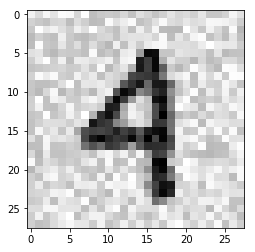

In [120]:
plt.imshow(X_test_mod[4233].reshape(28, 28), cmap=plt.cm.binary)

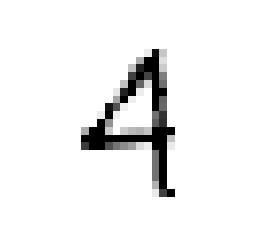

In [124]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[4233]])
plot_digit(clean_digit)

## Exercises

In [125]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'weights': ['uniform', 'distance'],
    'n_neighbors': [3, 4, 5],
}
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=2, n_jobs=8)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=uniform ..................................
[CV] n_neighbors=3, weights=distance .................................
[CV] n_neighbors=3, weights=distance .................................
[CV] n_neighbors=3, weights=distance .................................


In [126]:
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
    image = image.reshape(28, 28)
    shiftted_image = shift(image, [dy, dx], cval=0, mode='constant')
    return shiftted_image.reshape(28*28)

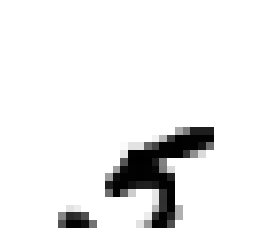

In [130]:
plot_digit(shift_image(some_digit, 0, 10))

In [131]:
X_train_augmented = list(X_train)
y_train_augmented = list(y_train)

for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
    for img, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(img, dx, dy))
        y_train_augmented.append(label)
        
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [132]:
shuffle_index = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_index]
y_train_augmented = y_train_augmented[shuffle_index]

In [134]:
from sklearn.metrics import accuracy_score

forest_clf.fit(X_train_augmented, y_train_augmented)
y_pred = forest_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9674

In [135]:
forest_clf.fit(X_train, y_train)
y_pred = forest_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.949